In [2]:
from random import randint
def timer(func):
    def func_wrapper(*args, **kwargs):
        from time import time_ns
        t_start = time_ns()
        func(*args, **kwargs)
        t_end = time_ns()
        print("timer report: {} took {:.9f}.".format(func.__name__, (t_end-t_start)*(10**(-9))))
        return (t_end-t_start)*(10**(-9))
    return func_wrapper

# 冒泡排序算法
@timer
def bubble_sort(num_list):
    for i in range(len(num_list)):
        for j in range(1, len(num_list) - i):
            if num_list[j] < num_list[j-1]:
                num_list[j], num_list[j-1] = num_list[j-1], num_list[j]

# 测试
nums = [randint(-1000, 1000) for i in range(1000)]
bubble_sort(nums)

timer report: bubble_sort took 0.123753200.


0.12375320000000001

timer report: bubble_sort took 0.000000000.
timer report: quick_sort took 0.000000000.
timer report: bubble_sort took 0.111517700.
timer report: quick_sort took 0.000000000.
timer report: bubble_sort took 0.515426600.
timer report: quick_sort took 0.000000000.
timer report: bubble_sort took 1.070058000.
timer report: quick_sort took 0.016493200.
timer report: bubble_sort took 1.752467900.
timer report: quick_sort took 0.015779300.
timer report: bubble_sort took 2.726664200.
timer report: quick_sort took 0.015882200.
timer report: bubble_sort took 4.041555100.
timer report: quick_sort took 0.016111300.
timer report: bubble_sort took 5.531353300.
timer report: quick_sort took 0.013497800.
timer report: bubble_sort took 7.166699500.
timer report: quick_sort took 0.016169900.
timer report: bubble_sort took 9.009256400.
timer report: quick_sort took 0.031591900.


F:\developer_use\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25490 (\N{CJK UNIFIED IDEOGRAPH-6392}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\developer_use\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\developer_use\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\developer_use\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\developer_use\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(b

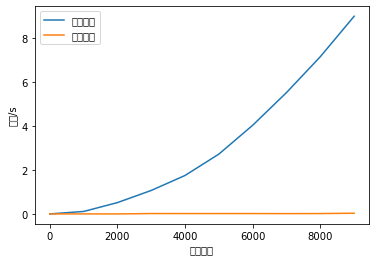

In [5]:
@timer
def quick_sort(num_list):
    def quick_sort_func(arr, left, right):
        if left >= right:
            return
        pivot = arr[left]
        i = left
        j = right
        while i < j:
            while i < j and arr[j] >= pivot:
                j -= 1
            arr[i] = arr[j]
            while i < j and arr[i] < pivot:
                i += 1
            arr[j] = arr[i]
        arr[i] = pivot
        quick_sort_func(arr, left, i-1)
        quick_sort_func(arr, i+1, right)
    quick_sort_func(num_list, 0, len(num_list)-1)


import matplotlib.pyplot as plt          # 利用matplotlib画出两个函数运行时间的折线图，进行分析比较
from copy import deepcopy
def compare_efficiency(func1, func2):
    time_func1 = []
    time_func2 = []
    size = [i*(10**3) for i in range(20)]
    for i in range(len(size)):
        nums_array = [randint(-10000, 10000) for j in range(size[i])]
        nums_array_copy = deepcopy(nums_array)
        time_func1.append(bubble_sort(nums_array))
        time_func2.append(quick_sort(nums_array_copy))
    plt.plot(size, time_func1)
    plt.plot(size, time_func2)
    plt.xlabel('排序方法')
    plt.ylabel('时间/s')
    plt.legend(['冒泡排序', '快速排序'])
    plt.show()
compare_efficiency(bubble_sort, quick_sort)
# 从折线图可以看出冒泡排序时间基本上都比快速排序要快，并且数据量越大，差异越大。还可以看出冒泡排序是以n^2的速度增长的，而快速排序则增长较慢